# Plot boxs

C:\Users\ching\AppData\Local\Temp\ipykernel_17316\1909861107.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(val_r2_values, labels=combination_names, patch_artist=True)
C:\Users\ching\AppData\Local\Temp\ipykernel_17316\1909861107.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(val_rmse_values, labels=combination_names, patch_artist=True)


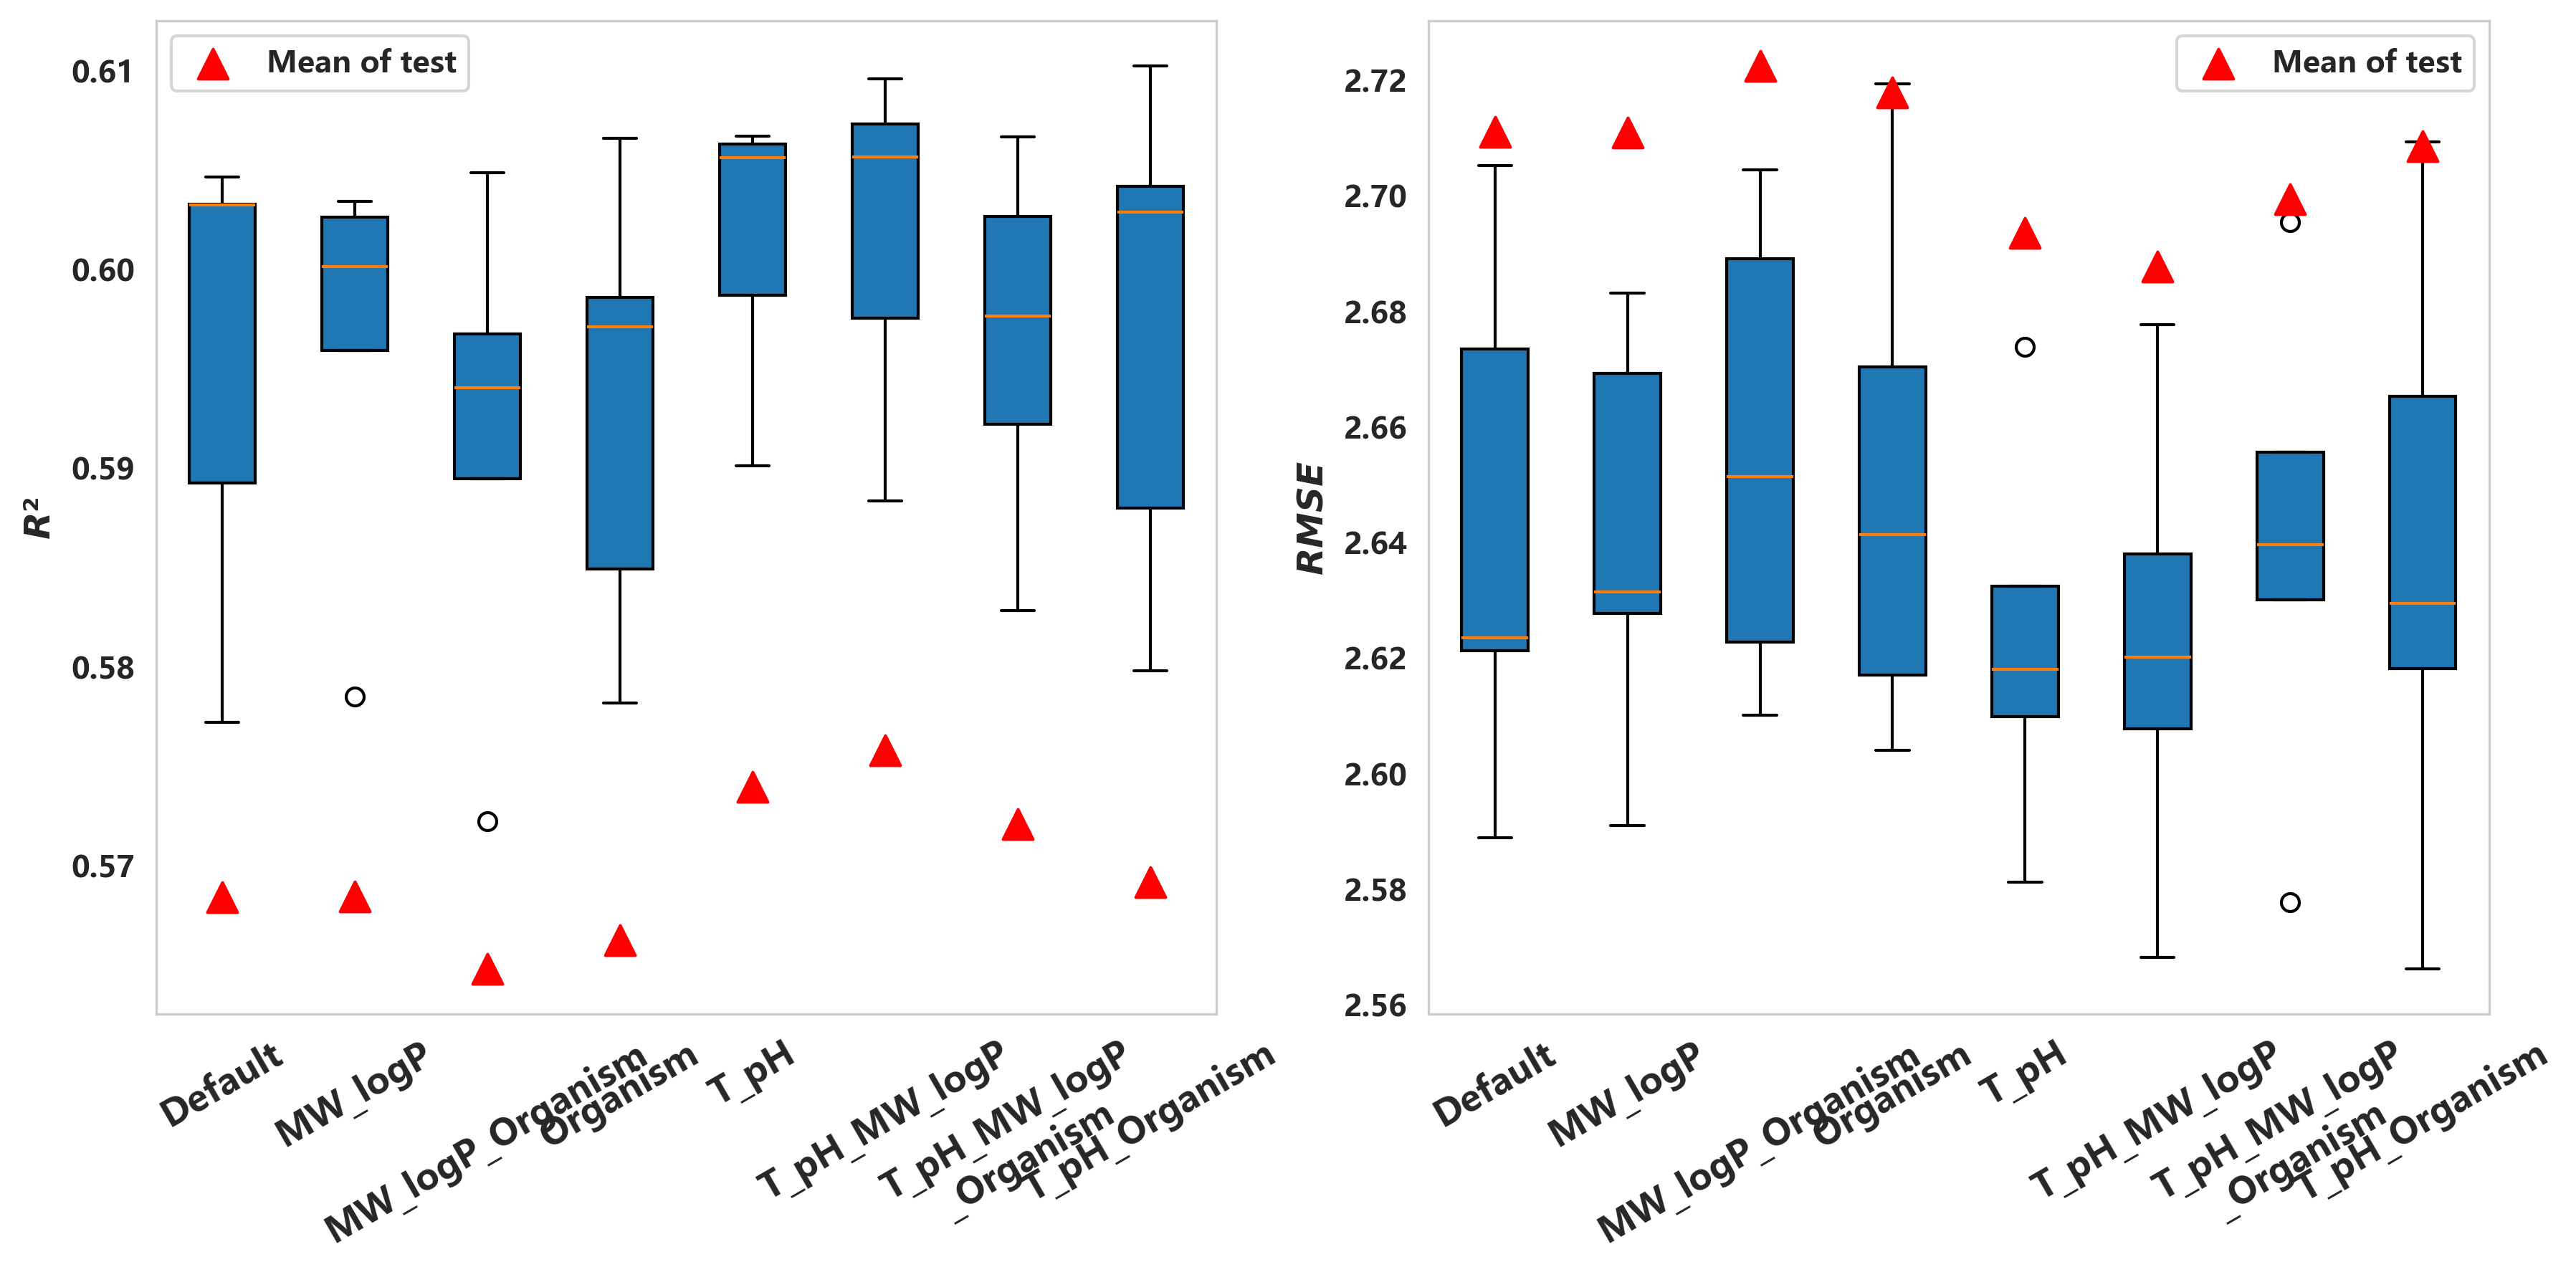

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
import matplotlib, os
matplotlib.rc("font",family='MicroSoft YaHei',weight="bold")
current_dir = os.getcwd()

df_cv_results = pd.read_excel(f'{current_dir}/cv_results.xlsx')

# 按组合分组
grouped = df_cv_results.groupby("Combination")
combination_names = list(grouped.groups.keys())
combination_names = [name.replace("t_ph_mw_logp_organism", "t_ph_mw_logp\n_organism").replace('ph', 'pH').replace('default', 'Default').replace('mw', 'MW').replace('logp', 'logP').replace('organism', 'Organism').replace('t_', 'T_') for name in combination_names]

val_r2_values = [group["Val_R2"].values for _, group in grouped]
val_rmse_values = [group["Val_RMSE"].values for _, group in grouped]

test_r2_values = [group["Test_R2"].values for _, group in grouped]
test_rmse_values = [group["Test_RMSE"].values for _, group in grouped]

# 计算均值
test_r2_values_mean = [np.mean(vals) for vals in test_r2_values]
test_rmse_values_mean = [np.mean(vals) for vals in test_rmse_values]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

# R² 图  on validation
axes[0].boxplot(val_r2_values, labels=combination_names, patch_artist=True)
axes[0].set_ylabel("$R²$", fontsize=12)
axes[0].tick_params(axis="x", rotation=30, labelsize=12)

# 确保 scatter 显示
axes[0].scatter(range(1, len(combination_names) + 1), test_r2_values_mean,
                c='red', marker='^', s=100, linewidths=1, zorder=3, label="Mean of test")
axes[0].legend(loc="best")
axes[0].grid(False)  # 取消网格线

# RMSE 图 on validation
axes[1].boxplot(val_rmse_values, labels=combination_names, patch_artist=True)
axes[1].set_ylabel("$RMSE$", fontsize=12)
axes[1].tick_params(axis="x", rotation=30, labelsize=12)

# 确保 scatter 显示
axes[1].scatter(range(1, len(combination_names) + 1), test_rmse_values_mean,
                c='red', marker='^', s=100, linewidths=1, zorder=3, label="Mean of test")
axes[1].legend(loc="best")
axes[1].grid(False)  # 取消网格线
plt.show()

# Plot Violin

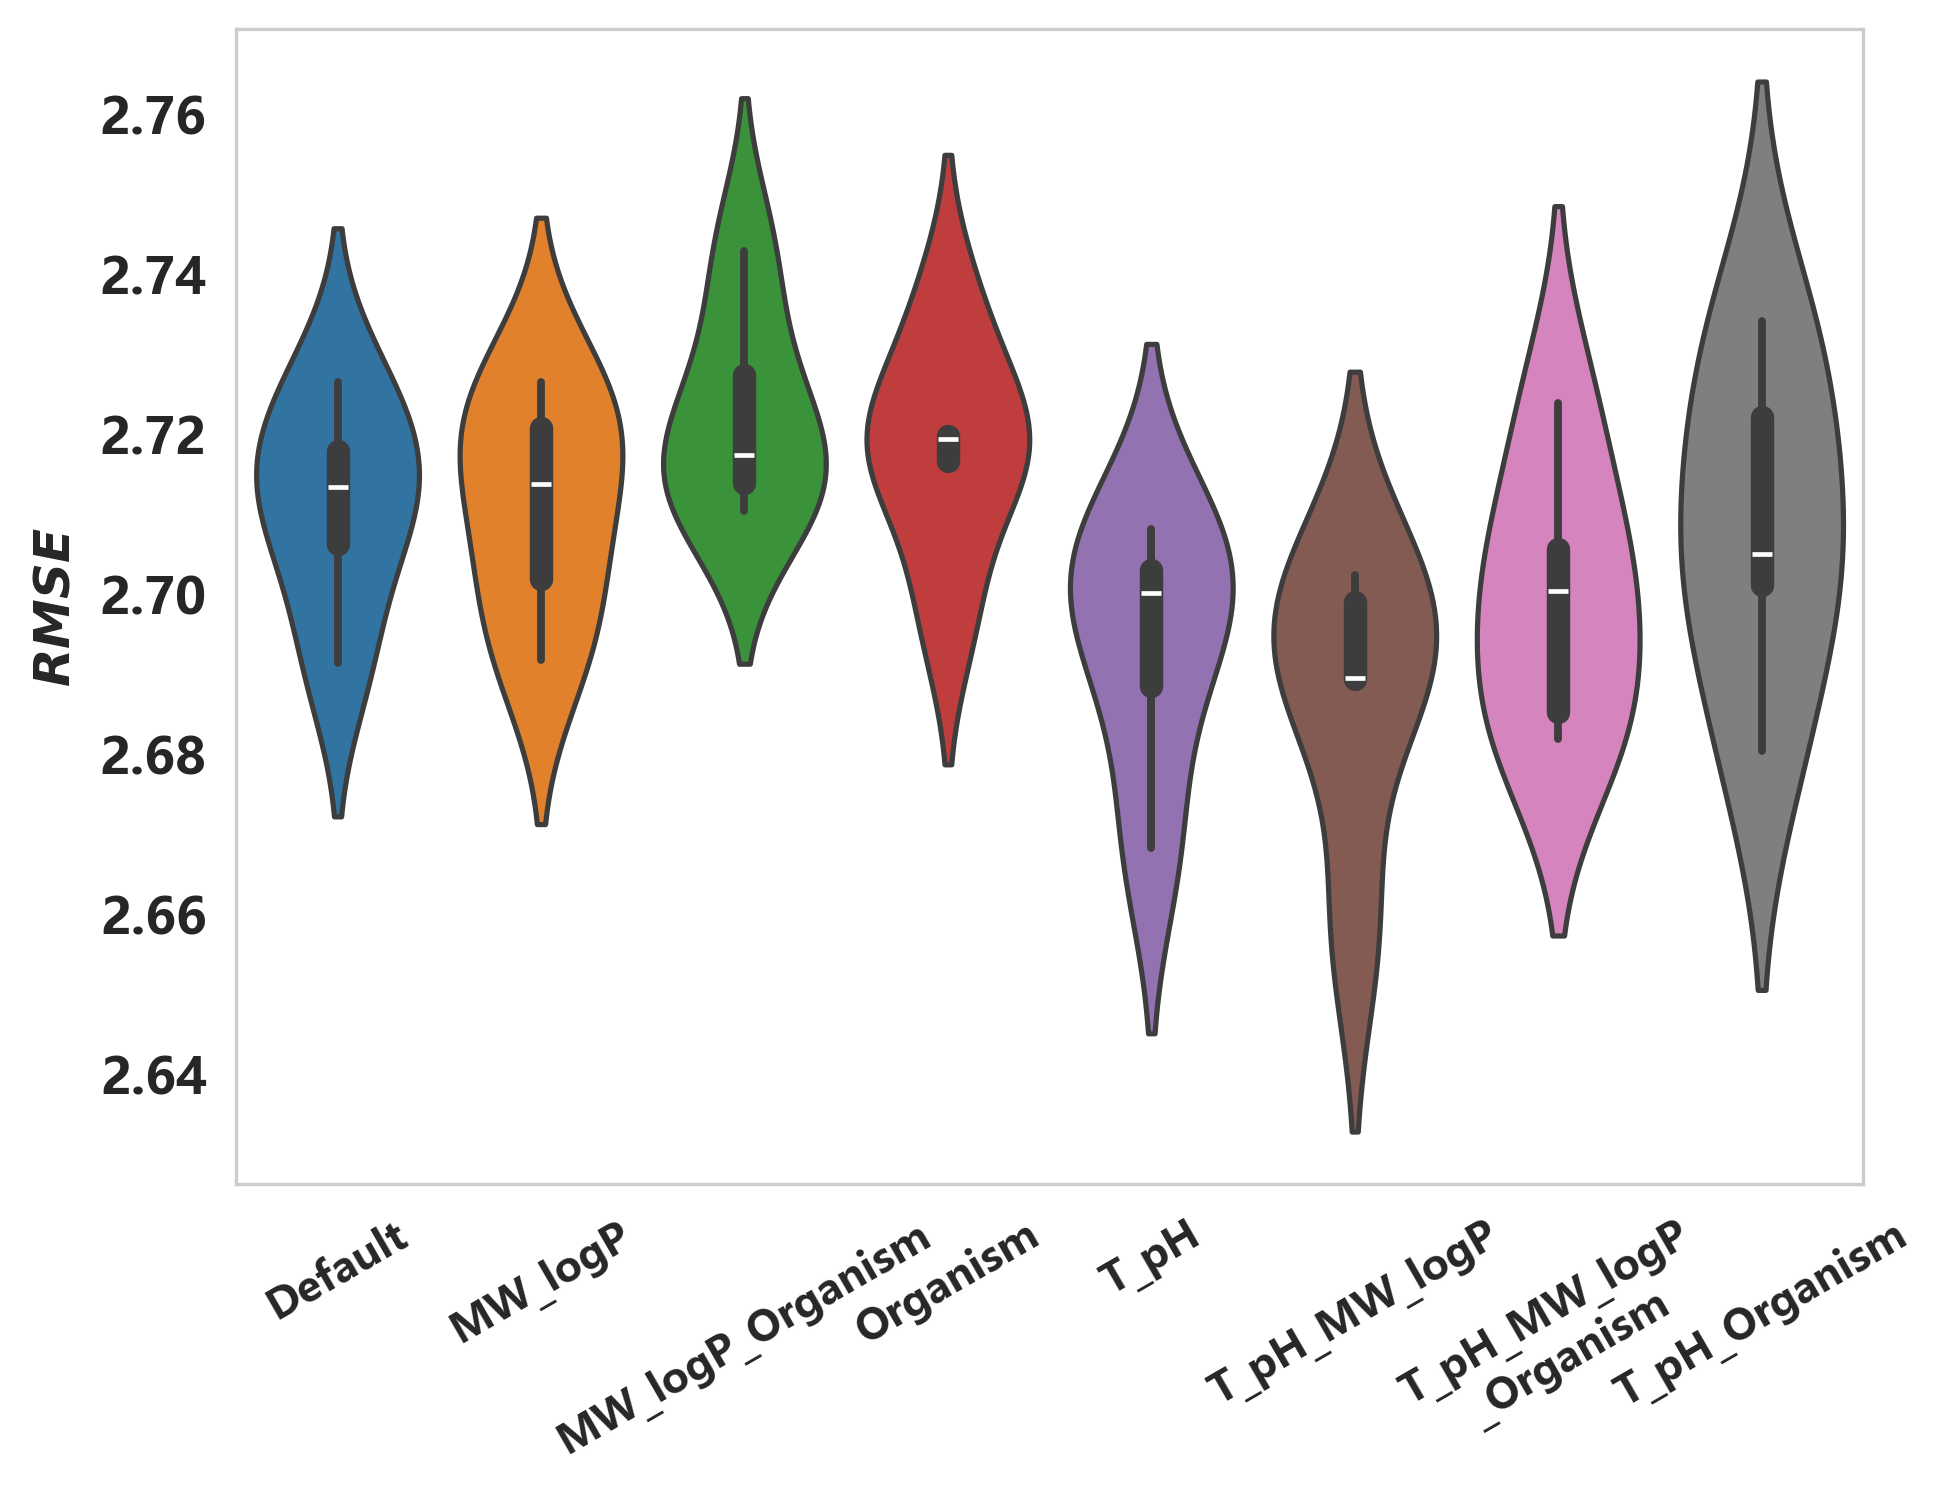

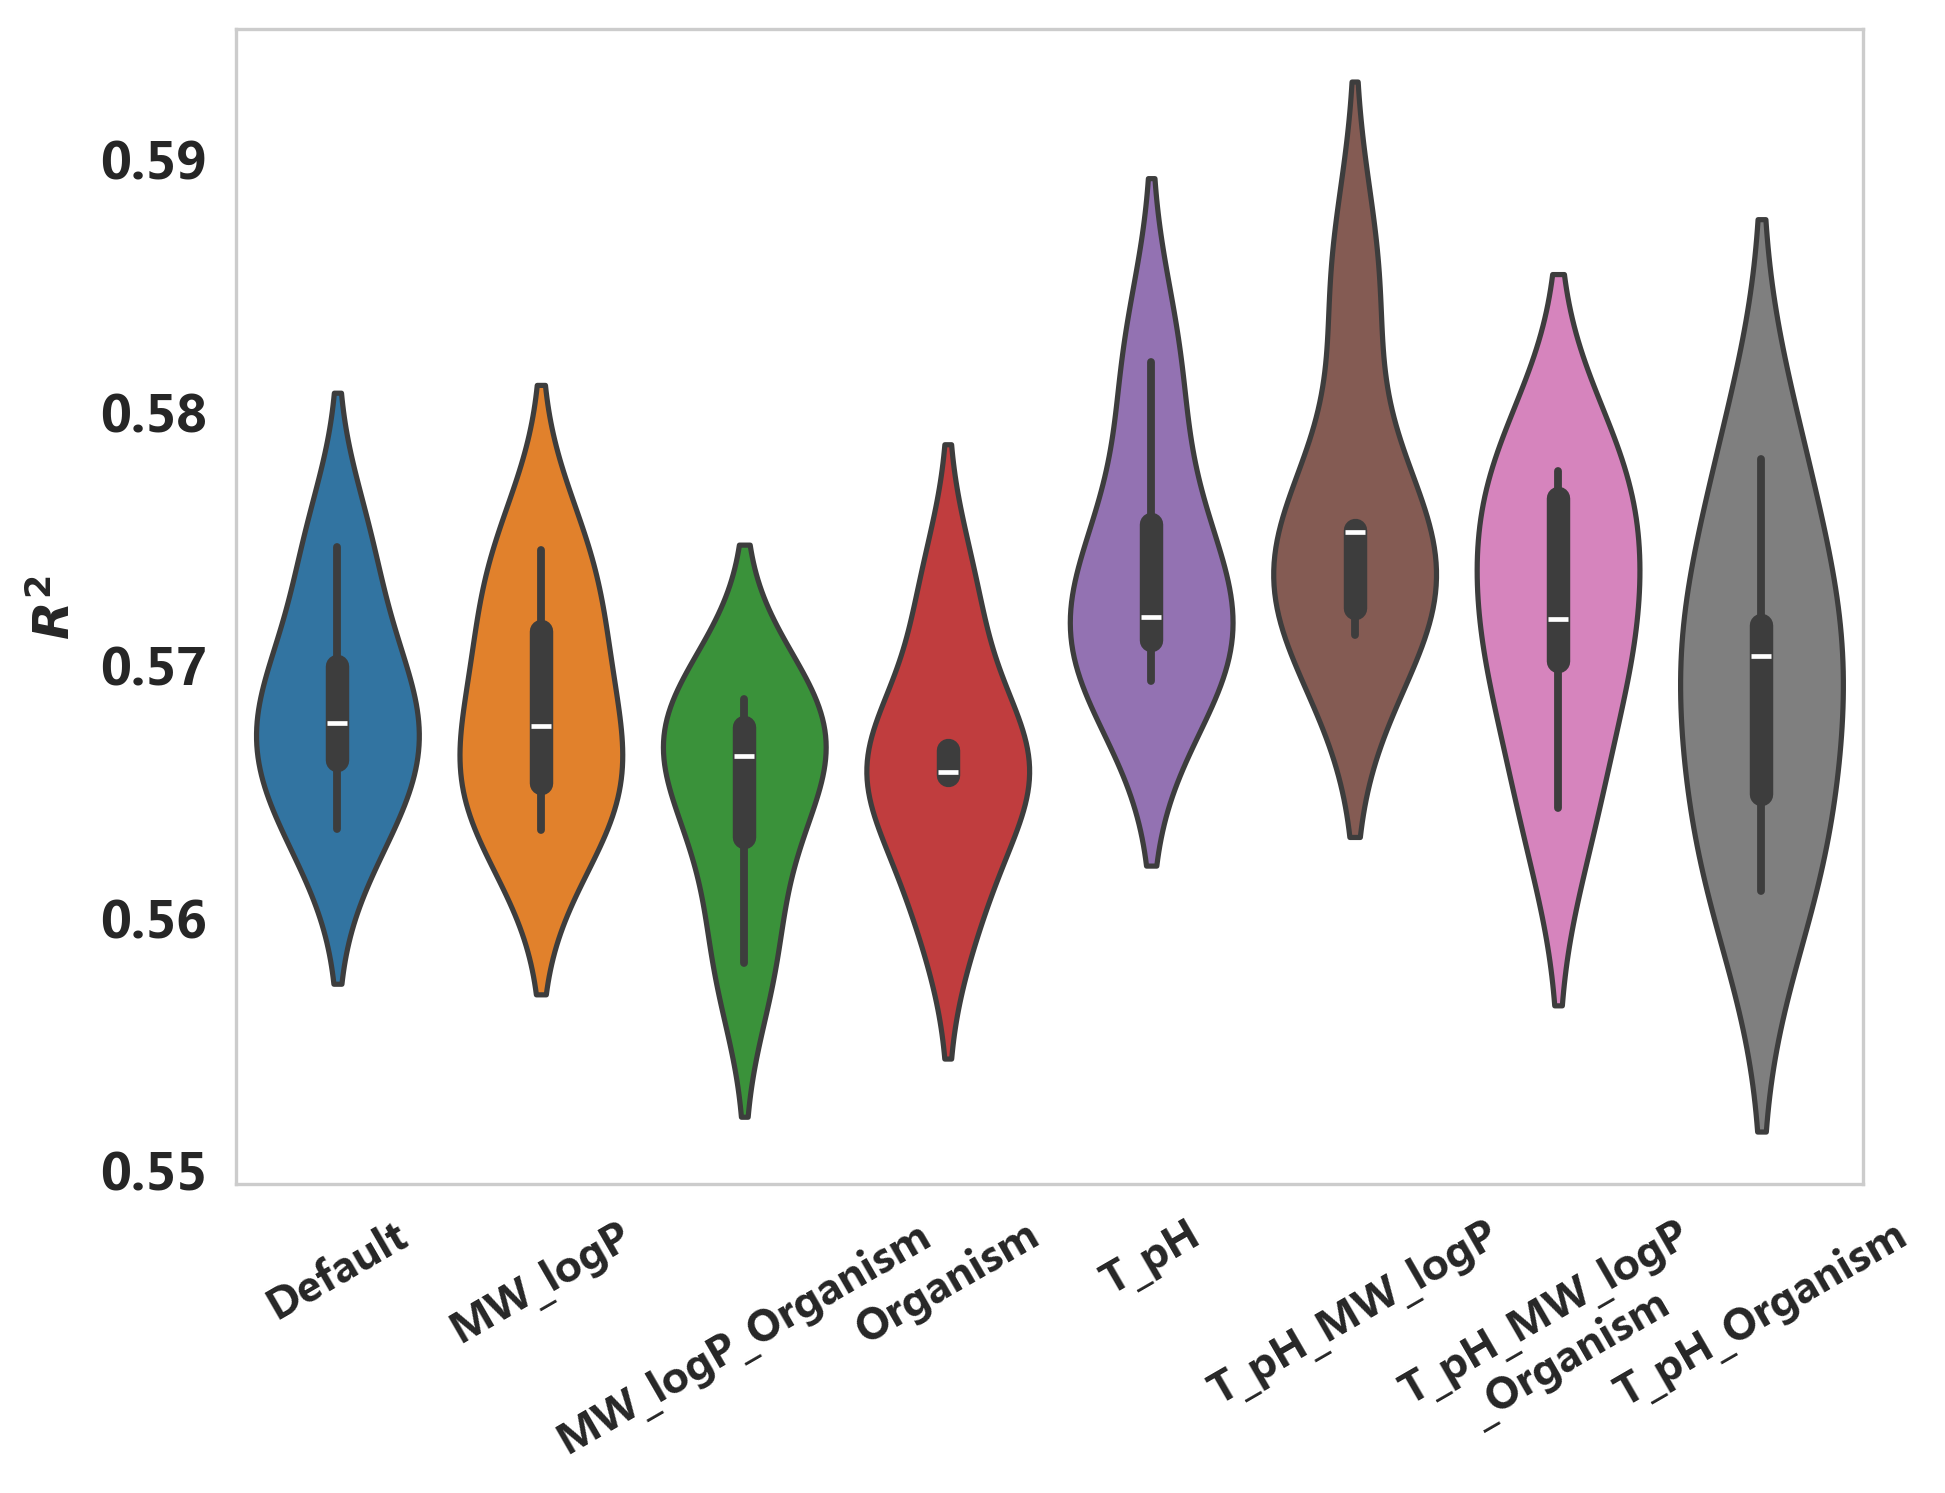

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
import matplotlib
matplotlib.rc("font",family='MicroSoft YaHei',weight="bold")

# 绘制 RMSE 的小提琴图 on test
fig = plt.figure(figsize=(7, 5), dpi=300)
ax = fig.add_subplot(111)
sns.violinplot(data=[test_rmse_values[i] for i in range(len(combination_names))], inner="box")
plt.xticks(ticks=range(len(combination_names)), labels=combination_names, rotation=30, size=10)
plt.ylabel("$RMSE$", fontsize=12)
plt.tick_params(axis="y", labelsize=12)  # 调整 y 轴刻度字体
plt.grid(False)  # 取消网格线
# plt.title("Distribution of Test RMSE Across Combinations", fontsize=16)
plt.savefig(f"{current_dir}/factors_ablation_test_rmse.png", dpi=300, bbox_inches="tight")
plt.show()

# 绘制 R² 的小提琴图 on test
fig = plt.figure(figsize=(7, 5), dpi=300)
ax = fig.add_subplot(111)
sns.violinplot(data=[test_r2_values[i] for i in range(len(combination_names))], inner="box")
plt.xticks(ticks=range(len(combination_names)), labels=combination_names, rotation=30, size=10)
plt.ylabel("$R^2$", fontsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.grid(False)  # 取消网格线
# plt.title("Distribution of Test R2 Across Combinations", fontsize=16)
plt.savefig(f"{current_dir}/factors_ablation_test_r2.png", dpi=300, bbox_inches="tight")
plt.show()